In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [2]:
cols = ['CodeAssure_id','Calculer_Sinistre','CodeAssure_id_adverse','IsPlannedFraud','dateOuvertureDuSinistre']

In [3]:
data = pd.DataFrame(columns = cols)

In [4]:
test = pd.DataFrame(columns = cols)

In [5]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre


In [6]:
data.dateOuvertureDuSinistre = pd.to_datetime(data["dateOuvertureDuSinistre"])

# Non Fraud Data Generation

In [7]:
data.CodeAssure_id = random.sample(range(1,120000),30000)
list = [x for x in random.sample(range(1,120000),60000) if x not in data.CodeAssure_id]
data.CodeAssure_id_adverse = list[0:30000]

In [8]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290,NaN,80880,NaN,NaT
1,22148,NaN,101598,NaN,NaT
2,50714,NaN,77610,NaN,NaT
3,18468,NaN,63424,NaN,NaT
4,103747,NaN,56925,NaN,NaT
...,...,...,...,...,...
29995,76655,NaN,111854,NaN,NaT
29996,92317,NaN,34232,NaN,NaT
29997,93913,NaN,87429,NaN,NaT
29998,89421,NaN,63655,NaN,NaT


In [9]:
for i in random.sample(set(data.CodeAssure_id),10000):
    data = data.append({'CodeAssure_id': i, 'Calculer_Sinistre': random.randint(0,1), 'CodeAssure_id_adverse': data.CodeAssure_id_adverse[random.randint(0,30000)], 'IsPlannedFraud': 0}, ignore_index=True)

In [10]:
for i in data.CodeAssure_id[random.sample(range(30001,40000),7000)].to_list():
    data = data.append({'CodeAssure_id': i, 'Calculer_Sinistre': random.randint(0,1), 'CodeAssure_id_adverse': data.CodeAssure_id_adverse[random.randint(30001,40001)], 'IsPlannedFraud': 0}, ignore_index=True)

In [11]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,NaN,80880.0,NaN,NaT
1,22148.0,NaN,101598.0,NaN,NaT
2,50714.0,NaN,77610.0,NaN,NaT
3,18468.0,NaN,63424.0,NaN,NaT
4,103747.0,NaN,56925.0,NaN,NaT
...,...,...,...,...,...
46995,22778.0,1.0,73590.0,0.0,NaT
46996,78571.0,1.0,51274.0,0.0,NaT
46997,91095.0,0.0,112257.0,0.0,NaT
46998,108620.0,0.0,89816.0,0.0,NaT


In [12]:
for i in data.CodeAssure_id[random.sample(range(40001,47000),3000)].to_list():
    data = data.append({'CodeAssure_id': i, 'Calculer_Sinistre': random.randint(0,1), 'CodeAssure_id_adverse': data.CodeAssure_id_adverse[random.randint(40001,47001)], 'IsPlannedFraud': 0}, ignore_index=True)

In [13]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,NaN,80880.0,NaN,NaT
1,22148.0,NaN,101598.0,NaN,NaT
2,50714.0,NaN,77610.0,NaN,NaT
3,18468.0,NaN,63424.0,NaN,NaT
4,103747.0,NaN,56925.0,NaN,NaT
...,...,...,...,...,...
49995,106430.0,1.0,87960.0,0.0,NaT
49996,104014.0,0.0,95063.0,0.0,NaT
49997,70583.0,1.0,76055.0,0.0,NaT
49998,30604.0,1.0,47436.0,0.0,NaT


In [14]:
datelist=pd.date_range(start='2000-01-01', end='2020-01-01')


In [15]:
dateslist=datelist.to_list()

In [16]:
for i in range(0,data.shape[0]):
    data.at[i,'dateOuvertureDuSinistre'] = random.choice(dateslist)

In [17]:
data_ = data.copy()
data.drop_duplicates(subset=['CodeAssure_id','CodeAssure_id_adverse'],inplace=True)

In [18]:
data['Calculer_Sinistre'].fillna(1,inplace=True)

In [19]:
data['IsPlannedFraud'].fillna(0,inplace=True)

In [20]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
49995,106430.0,1.0,87960.0,0.0,2009-06-15
49996,104014.0,0.0,95063.0,0.0,2018-03-20
49997,70583.0,1.0,76055.0,0.0,2019-08-16
49998,30604.0,1.0,47436.0,0.0,2004-01-31


# Fraud Data Generation

In [21]:
used = []
for i,r in data.iterrows():
    used.append((r['CodeAssure_id'],r['CodeAssure_id_adverse']))
    used.append((r['CodeAssure_id_adverse'],r['CodeAssure_id']))


In [22]:
len(used)

99988

In [23]:
i = 0 
lis = []
while i < 5000:
    ind = (random.randint(1,120000),random.randint(1,120000))
    if ind not in used:
        lis.append(ind)
        i+=1

In [24]:
len(lis)

5000

In [25]:
lis[0]

(18858, 31476)

In [26]:
from datetime import datetime, timedelta

In [27]:
for i in range(5000):
    randomdate=random.choice(dateslist)
    randomdate1=randomdate + timedelta(random.randint(90,365))
    data = data.append({'CodeAssure_id': lis[i][0], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][1], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][1], 'Calculer_Sinistre': 0, 'CodeAssure_id_adverse': lis[i][0], 'IsPlannedFraud': 1,'dateOuvertureDuSinistre':randomdate1}, ignore_index=True)

In [28]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
59989,49372.0,0.0,104326.0,1.0,2019-06-01
59990,29490.0,1.0,10990.0,0.0,2009-06-12
59991,10990.0,0.0,29490.0,1.0,2010-06-04
59992,104101.0,1.0,43302.0,0.0,2011-03-03


In [29]:
#data.drop_duplicates(subset=['CodeAssure_id','CodeAssure_id_adverse'],inplace=True)

In [30]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
59989,49372.0,0.0,104326.0,1.0,2019-06-01
59990,29490.0,1.0,10990.0,0.0,2009-06-12
59991,10990.0,0.0,29490.0,1.0,2010-06-04
59992,104101.0,1.0,43302.0,0.0,2011-03-03


In [31]:
i = 0 
lis = []
while i < 5000:
    a,b,c = random.randint(1,120000),random.randint(1,120000),random.randint(1,120000)
    if (a,b) not in used and (b,c) not in used and (c,a) not in used and (a,c) not in used and (b,a) not in used and (c,b) not in used:
        lis.append((a,b,c))
        i+=1

In [32]:
len(lis)

5000

In [33]:
lis[0]

(6887, 112186, 19644)

In [34]:
for i in range(5000):
    randomdate=random.choice(dateslist)
    randomdate1=randomdate + timedelta(random.randint(90,365))
    randomdate2=randomdate1 + timedelta(random.randint(90,365))
    data = data.append({'CodeAssure_id': lis[i][0], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][1], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][1], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][2], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate1}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][2], 'Calculer_Sinistre': 0, 'CodeAssure_id_adverse': lis[i][0], 'IsPlannedFraud': 1,'dateOuvertureDuSinistre':randomdate2}, ignore_index=True)

In [35]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
74989,36203.0,1.0,106354.0,0.0,2018-12-26
74990,106354.0,0.0,94299.0,1.0,2019-08-12
74991,98145.0,1.0,53815.0,0.0,2003-01-24
74992,53815.0,1.0,55311.0,0.0,2003-07-13


In [36]:
i = 0 
lis = []
while i < 3750:
    a,b,c,d = random.randint(1,120000),random.randint(1,120000),random.randint(1,120000),random.randint(1,120000)
    if (a,b) not in used and (b,c) not in used and (c,d) not in used and (d,a) not in used and (a,c) not in used and (a,d) not in used and (b,a) not in used and (b,d) not in used and (c,a) not in used and (c,b) not in used and (d,b) not in used and (d,c) not in used:
        lis.append((a,b,c,d))
        i+=1

In [37]:
len(lis)

3750

In [38]:
lis[0]

(80854, 87571, 54062, 2484)

In [39]:
for i in range(3750):
    randomdate=random.choice(dateslist)
    randomdate1=randomdate + timedelta(random.randint(90,365))
    randomdate2=randomdate1 + timedelta(random.randint(90,365))
    randomdate3=randomdate2 + timedelta(random.randint(90,365))
    data = data.append({'CodeAssure_id': lis[i][0], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][1], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][1], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][2], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate1}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][2], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][3], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate2}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][3], 'Calculer_Sinistre': 0, 'CodeAssure_id_adverse': lis[i][0], 'IsPlannedFraud': 1,'dateOuvertureDuSinistre':randomdate3}, ignore_index=True)

In [40]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
89989,111166.0,0.0,28480.0,1.0,2019-07-29
89990,118873.0,1.0,31748.0,0.0,2015-10-27
89991,31748.0,1.0,29150.0,0.0,2016-08-16
89992,29150.0,1.0,39203.0,0.0,2017-07-06


In [41]:
i = 0 
lis = []
while i < 2000:
    a,b,c,d,e = random.randint(1,120000),random.randint(1,120000),random.randint(1,120000),random.randint(1,120000),random.randint(1,120000)
    if (a,b) not in used and (b,c) not in used and (c,d) not in used and (d,a) not in used and (a,c) not in used and (a,d) not in used and (b,a) not in used and (b,d) not in used and (c,a) not in used and (c,b) not in used and (d,b) not in used and (d,c) not in used and (a,e) not in used and (b,e) not in used and (c,e) not in used and (d,e) not in used and (e,a) not in used and (e,b) not in used and (e,c) not in used and (e,d):
        lis.append((a,b,c,d,e))
        i+=1

In [42]:
for i in range(2000):
    randomdate=random.choice(dateslist)
    randomdate1=randomdate + timedelta(random.randint(90,365))
    randomdate2=randomdate1 + timedelta(random.randint(90,365))
    randomdate3=randomdate2 + timedelta(random.randint(90,365))
    randomdate4=randomdate3 + timedelta(random.randint(90,365))
    data = data.append({'CodeAssure_id': lis[i][0], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][1], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][1], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][2], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate1}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][2], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][3], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate2}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][3], 'Calculer_Sinistre': 1, 'CodeAssure_id_adverse': lis[i][4], 'IsPlannedFraud': 0,'dateOuvertureDuSinistre':randomdate3}, ignore_index=True)
    data = data.append({'CodeAssure_id': lis[i][4], 'Calculer_Sinistre': 0, 'CodeAssure_id_adverse': lis[i][0], 'IsPlannedFraud': 1,'dateOuvertureDuSinistre':randomdate4}, ignore_index=True)

In [43]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,68290.0,1.0,80880.0,0.0,2016-02-14
1,22148.0,1.0,101598.0,0.0,2006-06-03
2,50714.0,1.0,77610.0,0.0,2012-01-05
3,18468.0,1.0,63424.0,0.0,2003-04-14
4,103747.0,1.0,56925.0,0.0,2015-08-13
...,...,...,...,...,...
99989,46882.0,1.0,3396.0,0.0,2012-11-13
99990,3396.0,1.0,59266.0,0.0,2013-02-12
99991,59266.0,1.0,4355.0,0.0,2013-09-15
99992,4355.0,1.0,74293.0,0.0,2014-08-12


In [44]:
dup_id = []
for i in range(data.shape[0]):
    if data.at[i,'CodeAssure_id'] == data.at[i,'CodeAssure_id_adverse']:
        dup_id.append(i)
dup_id

[]

In [45]:
data.drop(dup_id,inplace=True)

In [46]:
data = data.sample(frac=1).reset_index(drop=True)

In [47]:
data

,CodeAssure_id,Calculer_Sinistre,CodeAssure_id_adverse,IsPlannedFraud,dateOuvertureDuSinistre
0,26382.0,1.0,23437.0,0.0,2017-06-12
1,23147.0,0.0,103173.0,1.0,2005-05-04
2,65647.0,0.0,51688.0,1.0,2012-06-04
3,14873.0,1.0,87599.0,0.0,2005-05-07
4,43544.0,1.0,109261.0,0.0,2013-01-29
...,...,...,...,...,...
99989,28012.0,1.0,46257.0,0.0,2004-04-01
99990,17459.0,1.0,84780.0,0.0,2018-11-23
99991,105388.0,0.0,43233.0,1.0,2008-02-25
99992,60494.0,1.0,64500.0,0.0,2002-01-07


In [48]:
import numpy as np

In [49]:
dateOuvertureDuSinistre = pd.to_datetime(data["dateOuvertureDuSinistre"])
dateOuvertureDuSinistre_year = dateOuvertureDuSinistre.dt.year
dateOuvertureDuSinistre_month_cos = np.cos((2*np.pi)/12*dateOuvertureDuSinistre.dt.month)
dateOuvertureDuSinistre_month_sin = np.sin((2*np.pi)/12*dateOuvertureDuSinistre.dt.month)
dateOuvertureDuSinistre_day_sin = np.cos((2*np.pi)/30*dateOuvertureDuSinistre.dt.day)
dateOuvertureDuSinistre_day_cos = np.cos((2*np.pi)/30*dateOuvertureDuSinistre.dt.day)

data['dateOuvertureDuSinistre_year'] = dateOuvertureDuSinistre_year
data['dateOuvertureDuSinistre_month_cos'] = dateOuvertureDuSinistre_month_cos
data['dateOuvertureDuSinistre_month_sin'] = dateOuvertureDuSinistre_month_sin
data['dateOuvertureDuSinistre_day_cos'] = dateOuvertureDuSinistre_day_cos
data['dateOuvertureDuSinistre_day_sin'] = dateOuvertureDuSinistre_day_sin

data.drop(columns=["dateOuvertureDuSinistre"], inplace=True)

In [50]:
data.to_csv("data3.csv",sep=",")

# Data Preprocessing

In [2]:
# uncomment if you want to skip data generation
#data= pd.read_csv("data3.csv",sep=",")

In [3]:
x = data.drop(axis="columns", columns=["IsPlannedFraud"])
y = data.IsPlannedFraud

In [4]:
x.drop(axis="columns", columns=["Unnamed: 0"], inplace=True)

In [5]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
test = pd.read_csv("test.csv",sep=",")
test.drop(axis="columns", columns=["Unnamed: 0"], inplace=True)

In [7]:
test.dropna(inplace=True)

In [8]:
x_test = test.drop(axis="columns", columns=["IsPlannedFraud"])
y_test = test.IsPlannedFraud

In [9]:
x_train=x

In [10]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
x_train = transformer.fit_transform(x)
x_test = transformer.transform(x_test)

# Modeling and Evaluation

In [11]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y, y_test)
models

C:\Users\Ramzi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [01:48<00:00,  3.76s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.90,0.94,0.94,0.91,0.19
BernoulliNB,0.90,0.94,0.94,0.91,0.13
SGDClassifier,0.90,0.94,0.94,0.91,0.29
RidgeClassifierCV,0.90,0.94,0.94,0.91,0.17
RidgeClassifier,0.90,0.94,0.94,0.91,0.12
QuadraticDiscriminantAnalysis,0.90,0.94,0.94,0.91,0.15
GaussianNB,0.90,0.94,0.94,0.91,0.10
NearestCentroid,0.90,0.94,0.94,0.91,0.11
SVC,0.90,0.92,0.92,0.91,75.52


In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [13]:
ad = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.2, n_estimators = 70)
ad.fit(x_train,y)
print('train score: ',ad.score(x_train,y))
y_pred = ad.predict(x_test)
print('test score',ad.score(x_test, y_test))

train score:  0.907234434066044
test score 0.9047404740474048


In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix, recall_score, f1_score,classification_report, precision_score, accuracy_score, cohen_kappa_score

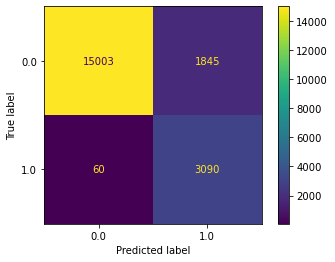

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     16848
         1.0       0.63      0.98      0.76      3150

    accuracy                           0.90     19998
   macro avg       0.81      0.94      0.85     19998
weighted avg       0.94      0.90      0.91     19998



In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix
plot_confusion_matrix(ad, x_test, y_test)  
plt.show()
y_pred=ad.predict(x_test)
print(classification_report(y_test, y_pred))

In [16]:
from sklearn.svm import SVC

# Instantiate classifier
svc = SVC(kernel = "linear") # changed to "linear"

# fit on training data
svc.fit(x_train, y)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(svc.score(x_train, y)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.902
Accuracy on test set: 0.901


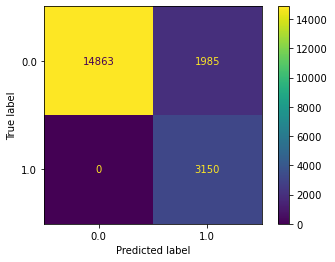

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     16848
         1.0       0.63      0.98      0.76      3150

    accuracy                           0.90     19998
   macro avg       0.81      0.94      0.85     19998
weighted avg       0.94      0.90      0.91     19998



In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()
y_pred=ad.predict(x_test)
print(classification_report(y_test, y_pred))

In [18]:
# import the necessary modules
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# I'll add a standard scaler since SVC works better if the data is scaled.
pipe = Pipeline([ ('classifier', SVC(kernel = "linear"))])

# Next we'll tune hyperparameters of the estimators separately in the pipeline
param_grid = [
    {'classifier': [SVC()],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]}]
# grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(x_train, y)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(x_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.1), 'classifier__C': 10, 'classifier__gamma': 0.1}

Best cross-validation score: 0.91
Test-set score: 0.90


In [19]:
print("Test-set score: {:.4f}".format(grid.score(x_test, y_test)))

Test-set score: 0.9036
